This project demonstrates the transfer of weights of a pre-trained pytorch model to tensorflow, instead of re-training the entire model. Here, we first train a PyTorch model and then push the same weights to the TensorFlow model. Comparing the accuracy, it goes from about 10% aprox (can change based on weights innitialisation) to 99% by transfering/copying weights <br><br>

The same work can be executed on pre-trained models. We need to innitialise the corrosponding PyTorch model and just copy weights. Training the whole model might take minutes or even hours, and there can be a loss of accuracy. But this way, accuracy is perfectly same and time to get weights from pre-trained models are in milli-seconds

# Training PyTorch Model

In [1]:
# Import Required Packages of PyTorch

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook 

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define device : if GPU is available 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device 

device(type='cuda', index=0)

In [3]:
# Download dataset 
# Working on MNIST dataset for this project

batch_size = 512
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [4]:
# Main PyTorch Model 
# Architecture : 
#           28 * 28 ->(reshape)-> 784 ->(fully connected layer)-> 500 
#           ->(fully connected layer)-> 300 ->(fully connected layer)-> 
#           100 ->(fully connected layer)-> 10

class MyNet(nn.Module):
    
    def __init__(self): 
        super(MyNet, self).__init__()
        self.layer1 = nn.Linear(784, 500)
        self.layer2 = nn.Linear(500, 300)
        self.layer3 = nn.Linear(300, 100)
        self.layer4 = nn.Linear(100, 10)
             
    def forward (self, image) :
        image = image.reshape(image.shape[0], -1)
        image = F.relu(self.layer1(image))
        image = F.relu(self.layer2(image))
        image = F.relu(self.layer3(image))
        image = F.softmax(self.layer4(image), dim=1)
        return image 

In [5]:
# Instantiate Model and push to GPU
model_pt = MyNet().to(device) 
print(model_pt)


MyNet(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=300, bias=True)
  (layer3): Linear(in_features=300, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=10, bias=True)
)


In [6]:
# Define loss function and optimiser
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model_pt.parameters())

In [7]:
# Function to Display Image 
def show_img_pt (num) :
    shp = trainset[num][0].shape
    img = trainset[num][0].reshape(1,shp[0],784)
    final_class = np.argmax(model_pt(img.to(device)).to('cpu').detach().numpy())
    print('Predicted Digit -> ', final_class)
    plt.imshow(trainset[num][0].reshape(28,28), cmap=plt.get_cmap('gray'))

Predicted Digit ->  8


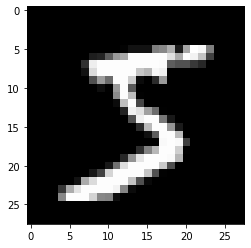

In [8]:
# Before training, Image0 is predicted as :
show_img_pt(0)

Predicted Digit ->  8


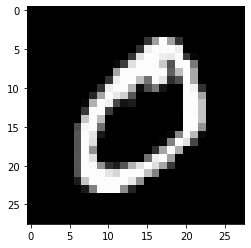

In [9]:
# Before training, Image1 is predicted as :
show_img_pt(1)

Predicted Digit ->  8


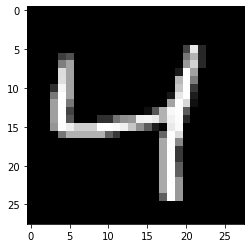

In [10]:
# Before training, Image2 is predicted as :
show_img_pt(2)

Predicted Digit ->  8


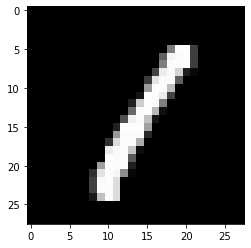

In [11]:
# Before training, Image3 is predicted as :
show_img_pt(3)

Predicted Digit ->  8


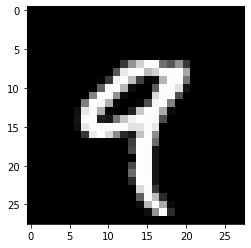

In [12]:
# Before training, Image4 is predicted as :
show_img_pt(4)

Predicted Digit ->  8


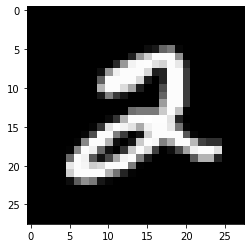

In [13]:
# Before training, Image5 is predicted as :
show_img_pt(5)

Predicted Digit ->  8


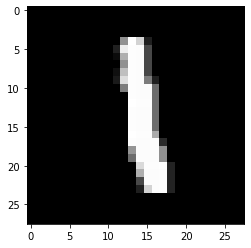

In [14]:
# Before training, Image6 is predicted as :
show_img_pt(6)

Predicted Digit ->  1


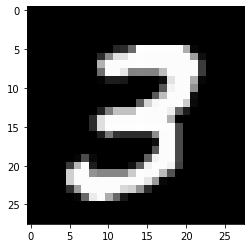

In [15]:
# Before training, Image7 is predicted as :
show_img_pt(7)

Predicted Digit ->  8


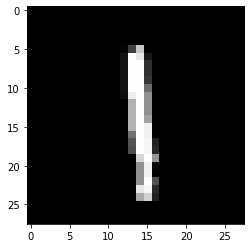

In [16]:
# Before training, Image8 is predicted as :
show_img_pt(8)

Predicted Digit ->  2


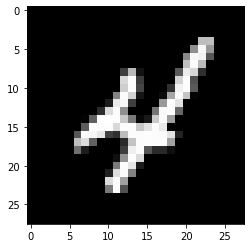

In [17]:
# Before training, Image9 is predicted as :
show_img_pt(9)

In [18]:
# Function to calculate accuracy of pytorch model
def calc_accuracy_pt (verbose=True) :
    correct = 0 
    for num in range(len(trainset)) :
        img = trainset[num][0].reshape(1,trainset[num][0].shape[0],784)
        final_class = np.argmax(model_pt(img.to(device)).to('cpu').detach().numpy())
        if final_class == trainset[num][1] : correct += 1
    if verbose : print('Total Correct -> ', correct, '/', len(trainset), '\n% Correct -> ', correct/len(trainset) * 100)
    else : return correct

# Accuracy before training
calc_accuracy_pt()

Total Correct ->  4767 / 60000 
% Correct ->  7.945


In [19]:
# Training Pytorch model

max_epochs = 20

for epoch in tqdm_notebook(range(max_epochs), total=max_epochs, unit="epoch"):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data 
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad() 
        outputs = model_pt(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

In [20]:
# Freeze training weights, no more update is done to weights

for param in model_pt.parameters(): 
    param.requires_grad = False 
    
# Shift model to CPU
device = 'cpu' 
model_pt.to(device) 

MyNet(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=300, bias=True)
  (layer3): Linear(in_features=300, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=10, bias=True)
)

Predicted Digit ->  5


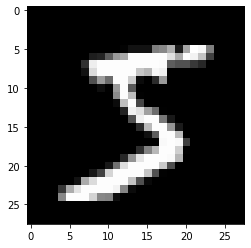

In [21]:
# After training, Image0 is predicted as :
show_img_pt(0)

Predicted Digit ->  0


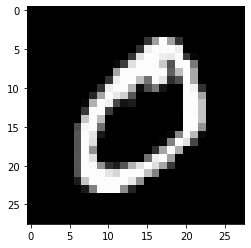

In [22]:
# After training, Image1 is predicted as :
show_img_pt(1)

Predicted Digit ->  4


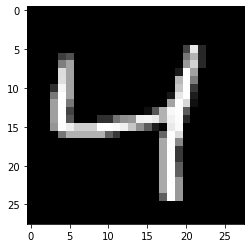

In [23]:
# After training, Image2 is predicted as :
show_img_pt(2)

Predicted Digit ->  1


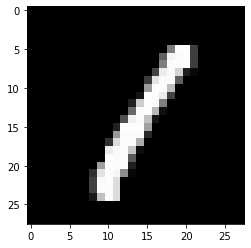

In [24]:
# After training, Image3 is predicted as :
show_img_pt(3)

Predicted Digit ->  9


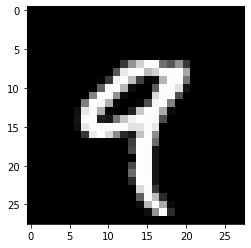

In [25]:
# After training, Image4 is predicted as :
show_img_pt(4)

Predicted Digit ->  2


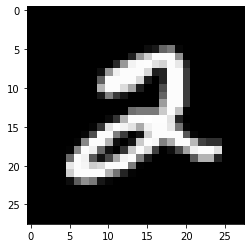

In [26]:
# After training, Image5 is predicted as :
show_img_pt(5)

Predicted Digit ->  1


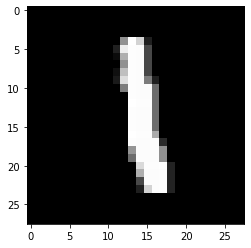

In [27]:
# After training, Image6 is predicted as :
show_img_pt(6)

Predicted Digit ->  3


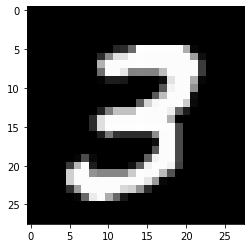

In [28]:
# After training, Image7 is predicted as :
show_img_pt(7)

Predicted Digit ->  1


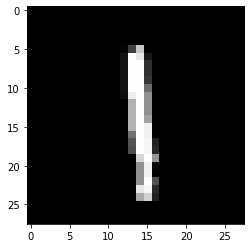

In [29]:
# After training, Image8 is predicted as :
show_img_pt(8)

Predicted Digit ->  4


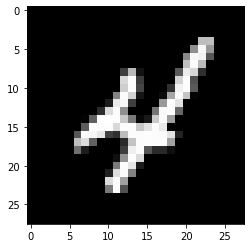

In [30]:
# After training, Image9 is predicted as :
show_img_pt(9)

In [31]:
# Accuracy of PyTorch Model after Training
calc_accuracy_pt()

Total Correct ->  59379 / 60000 
% Correct ->  98.965


# TensorFlow

In [32]:
# Import Required Packages of TensorFlow

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import tensorflow as tf

In [33]:
# Main TensorFlow/Keras Model 
# Architecture : 
#           28 * 28 ->(reshape)-> 784 ->(fully connected layer)-> 500 
#           ->(fully connected layer)-> 300 ->(fully connected layer)-> 
#           100 ->(fully connected layer)-> 10

model_tf = tf.keras.Sequential([
                                tf.keras.layers.Dense(500, activation='relu', input_shape=(784,)),
                                tf.keras.layers.Dense(300, activation='relu') ,
                                tf.keras.layers.Dense(100, activation='relu') ,
                                tf.keras.layers.Dense( 10, activation='softmax') 
                               ])

In [34]:
# Function to Display Image 
def show_img_tf (num) :
    shp = trainset[num][0].shape
    img = trainset[num][0].reshape(1,shp[0],784)
    final_class = np.argmax(model_tf(tf.convert_to_tensor(img)))
    print('Predicted Digit -> ', final_class)
    plt.imshow(trainset[num][0].reshape(28,28), cmap=plt.get_cmap('gray'))

In [35]:
# Function to calculate accuracy of TensorFlow model
def calc_accuracy_tf (verbose=True) :
    correct = 0 
    for num in range(len(trainset)) :
        img = trainset[num][0].reshape(1,trainset[num][0].shape[0],784)
        final_class = np.argmax(model_tf(tf.convert_to_tensor(img)))
        if final_class == trainset[num][1] : correct += 1
    if verbose : print('Total Correct -> ', correct, '/', len(trainset), '\n% Correct -> ', correct/len(trainset) * 100)
    else : return correct

calc_accuracy_tf()

Total Correct ->  5187 / 60000 
% Correct ->  8.645


Predicted Digit ->  4


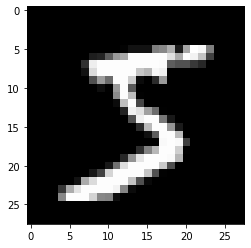

In [36]:
# Before training, Image0 is predicted as :
show_img_tf(0)

Predicted Digit ->  1


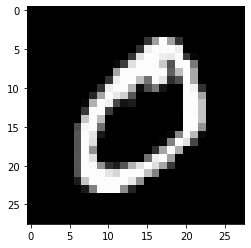

In [37]:
# Before training, Image1 is predicted as :
show_img_tf(1)

Predicted Digit ->  4


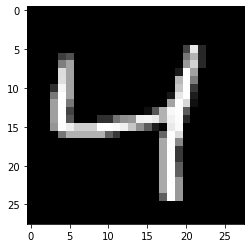

In [38]:
# Before training, Image2 is predicted as :
show_img_tf(2)

Predicted Digit ->  5


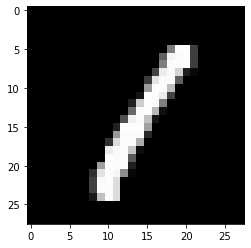

In [39]:
# Before training, Image3 is predicted as :
show_img_tf(3)

Predicted Digit ->  4


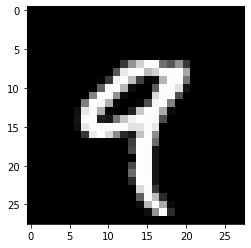

In [40]:
# Before training, Image4 is predicted as :
show_img_tf(4)

Predicted Digit ->  4


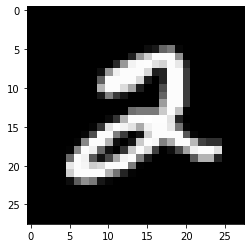

In [41]:
# Before training, Image5 is predicted as :
show_img_tf(5)

Predicted Digit ->  4


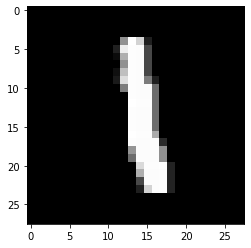

In [42]:
# Before training, Image6 is predicted as :
show_img_tf(6)

Predicted Digit ->  4


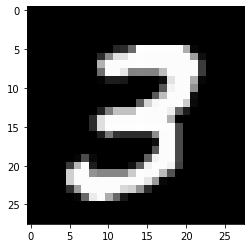

In [43]:
# Before training, Image7 is predicted as :
show_img_tf(7)

Predicted Digit ->  4


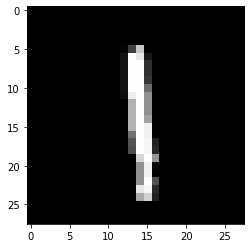

In [44]:
# Before training, Image8 is predicted as :
show_img_tf(8)

Predicted Digit ->  4


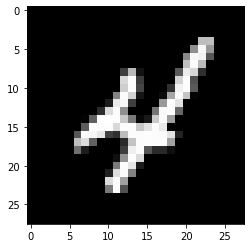

In [45]:
# Before training, Image9 is predicted as :
show_img_tf(9)

In [46]:
# Main Function to Transfer weights from pytorch to tensorflow
# This is cross-framework transfer learning
%%time
model_tf.set_weights([
                      model_pt.layer1.weight.T.numpy(), model_pt.layer1.bias.T.numpy(),
                      model_pt.layer2.weight.T.numpy(), model_pt.layer2.bias.T.numpy(),
                      model_pt.layer3.weight.T.numpy(), model_pt.layer3.bias.T.numpy(),
                      model_pt.layer4.weight.T.numpy(), model_pt.layer4.bias.T.numpy()
                    ])

CPU times: user 5.17 ms, sys: 977 µs, total: 6.14 ms
Wall time: 6.4 ms


Predicted Digit ->  5


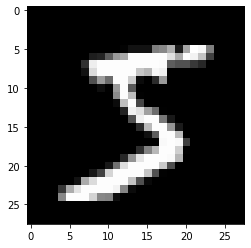

In [47]:
# After training, Image0 is predicted as :
show_img_tf(0)

Predicted Digit ->  0


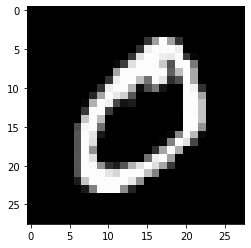

In [48]:
# After training, Image1 is predicted as :
show_img_tf(1)

Predicted Digit ->  4


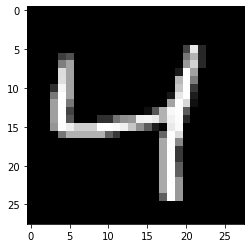

In [49]:
# After training, Image2 is predicted as :
show_img_tf(2)

Predicted Digit ->  1


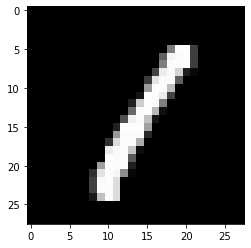

In [50]:
# After training, Image3 is predicted as :
show_img_tf(3)

Predicted Digit ->  9


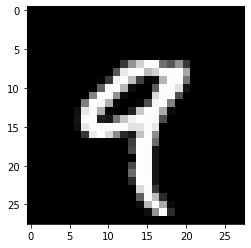

In [51]:
# After training, Image4 is predicted as :
show_img_tf(4)

Predicted Digit ->  2


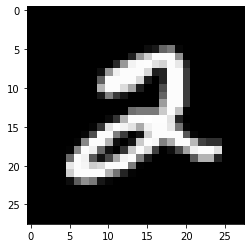

In [52]:
# After training, Image5 is predicted as :
show_img_tf(5)

Predicted Digit ->  1


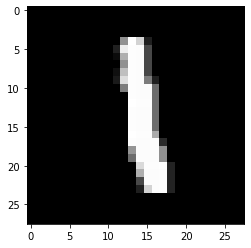

In [53]:
# After training, Image6 is predicted as :
show_img_tf(6)

Predicted Digit ->  3


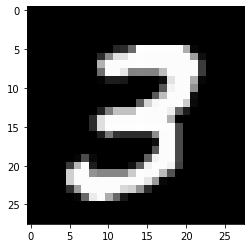

In [54]:
# After training, Image7 is predicted as :
show_img_tf(7)

Predicted Digit ->  1


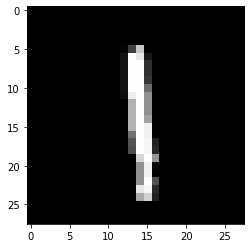

In [55]:
# After training, Image8 is predicted as :
show_img_tf(8)

Predicted Digit ->  4


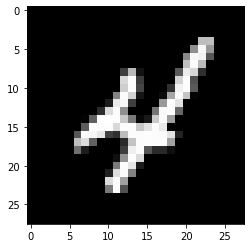

In [56]:
# After training, Image9 is predicted as :
show_img_tf(9)

In [57]:
# Accuracy of TensorFlow model after transfering weights 
# No training required, done in 6.4ms instead of training the whole network
calc_accuracy_tf()

Total Correct ->  59379 / 60000 
% Correct ->  98.965
